# **Install Sklearn Fuzzy**

In [1]:
pip install -U scikit-fuzzy

     |████████████████████████████████| 993 kB 4.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894068 sha256=c9ce32f6b905b2030ea022b6d91081faa4fb98c9dc5dd5df287ebdc860bbd52f
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy
Note: you may need to restart the kernel to use updated packages.


# I. Original data

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sb
import folium #visualize map
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar #calendar
from sklearn.cluster import KMeans #k-means clustering
from yellowbrick.cluster import KElbowVisualizer #Elbow visualize K-means
from skfuzzy.cluster import cmeans, cmeans_predict #fuzzy clustering
from sklearn import mixture #Gaussian Mixture Modelling
from sklearn.mixture import GaussianMixture

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/uber-pickups-in-new-york-city/Uber-Jan-Feb-FOIL.csv
/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-jul14.csv
/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-may14.csv
/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-apr14.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Carmel_B00256.csv
/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-janjune-15.csv
/kaggle/input/uber-pickups-in-new-york-city/other-American_B01362.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Skyline_B00111.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Lyft_B02510.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Dial7_B00887.csv
/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-jun14.csv
/kaggle/input/uber-pickups-in-new-york-city/other-FHV-services_jan-aug-2015.csv
/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-aug14.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Firstclass_B01536.csv
/kaggle/input/uber-pickups-in

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


**#Read dataset**

In [3]:
df1 = pd.read_csv("/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-apr14.csv")
df2 = pd.read_csv("/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-aug14.csv")
df3 = pd.read_csv("/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-jul14.csv")
df4 = pd.read_csv("/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-jun14.csv")
df5 = pd.read_csv("/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-may14.csv")
df6 = pd.read_csv("/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-sep14.csv")

**#Row bind using pandas concatenate**

In [4]:
df_ori = pd.concat([df1, df2, df3, df4, df5, df6])

In [5]:
df_ori.shape

(4534327, 4)

In [6]:
df_ori.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


# 1. K-means clustering

#Selecting Feature

In [7]:
clus_k_ori = df_ori[['Lat', 'Lon']]
clus_k_ori.dtypes

Lat    float64
Lon    float64
dtype: object

#Plot the number of cluster

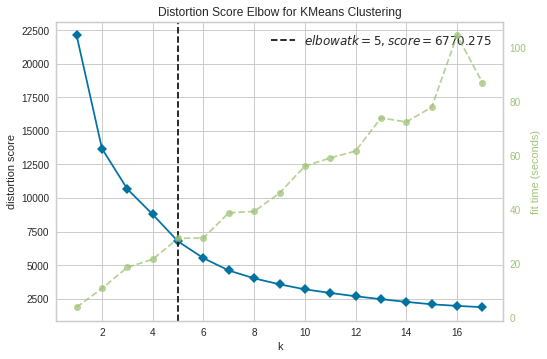

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model_ori = KMeans()
visualizer = KElbowVisualizer(model_ori, k = (1, 18)) #k = 1 to 17
visualizer.fit(clus_k_ori)
visualizer.show()

#Assign number of cluster K-Means Algorithm

In [9]:
kmeans_ori = KMeans(n_clusters = 5, random_state = 0) #k = 5
kmeans_ori.fit(clus_k_ori)

KMeans(n_clusters=5, random_state=0)

#Storing the Centroids

In [10]:
centroids_k_ori = kmeans_ori.cluster_centers_
centroids_k_ori

array([[ 40.71600413, -73.98971408],
       [ 40.66573796, -73.76418117],
       [ 40.79662299, -73.87899073],
       [ 40.76235269, -73.97687068],
       [ 40.69504708, -74.20164878]])

In [11]:
clocation_k_ori = pd.DataFrame(centroids_k_ori, columns = ['Latitude', 'Longitude'])

In [12]:
clocation_k_ori

,Latitude,Longitude
0,40.716004,-73.989714
1,40.665738,-73.764181
2,40.796623,-73.878991
3,40.762353,-73.976871
4,40.695047,-74.201649


#Visualize Centroids using map

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  """Entry point for launching an IPython kernel.


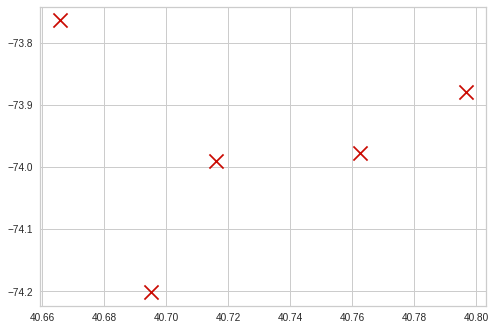

In [13]:
plt.scatter(clocation_k_ori['Latitude'], clocation_k_ori['Longitude'], marker = "x", color = 'R', s = 200)

In [14]:
centroid_k_ori = clocation_k_ori.values.tolist()

map_k_ori = folium.Map(location = [40.71600413400166, -73.98971408426613], zoom_start = 10)
for point in range(0, len(centroid_k_ori)):
    folium.Marker(centroid_k_ori[point], popup = centroid_k_ori[point]).add_to(map_k_ori)

map_k_ori

#Grouping and visualizing the total number of cluster

In [15]:
label_k_ori = kmeans_ori.labels_
label_k_ori

array([3, 0, 0, ..., 2, 0, 0], dtype=int32)

In [16]:
df_new_k = df_ori.copy()
df_new_k['Clusters'] = label_k_ori
df_new_k

,Date/Time,Lat,Lon,Base,Clusters
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,3
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,0
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,0
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,3
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,3
...,...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764,3
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764,4
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764,2
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764,0


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


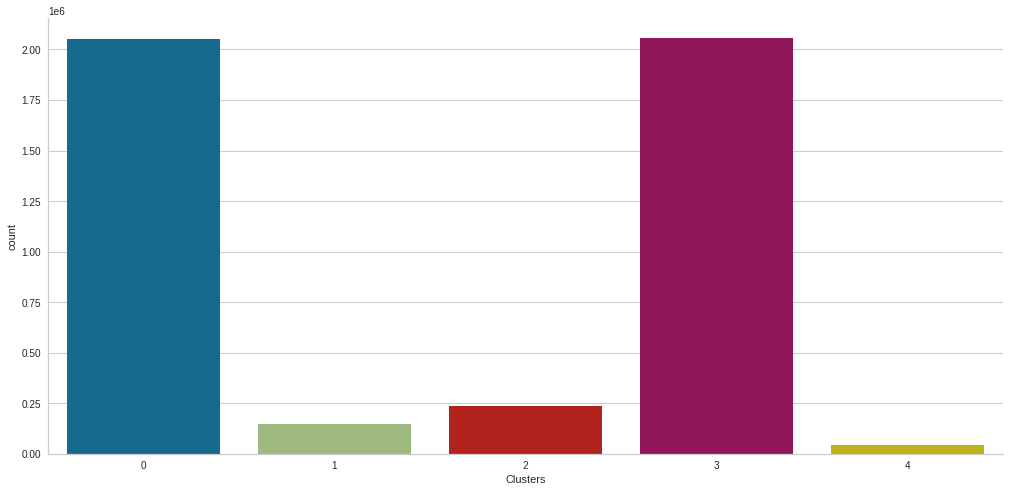

In [17]:
sb.factorplot(data = df_new_k, x = "Clusters", kind = "count", size = 7, aspect = 2)

#Compare the cluster

In [18]:
count_3 = 0
count_0 = 0
for value in df_new_k['Clusters']:
    if value == 3:
        count_3 += 1
    if value == 0:
        count_0 += 1
print(count_0, count_3)

2052540 2054339


#Predict cluster for new location

In [19]:
new_location_ori = [(40.86, -75.56)]
kmeans_ori.predict(new_location_ori)

array([4], dtype=int32)

# 2. Sklearn Fuzzy

#Selecting Feature

In [20]:
clus_fuz_ori = df_ori[['Lat', 'Lon']]

#For loop to determine the number of cluster

In [21]:
fpcs_ori = []

# n_cluster = 1 to 11
for n_cluster in range(1, 11):
    cntr, u, u0, d, jm, p, fpc_ori = cmeans(clus_fuz_ori.T, n_cluster, 2 , error=0.01, maxiter=1000)
    fpcs_ori.append(fpc_ori)

#Plot the number of centers

Text(0, 0.5, 'Fuzzy partition coefficient')

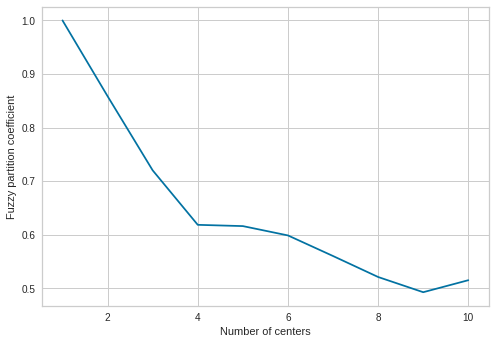

In [22]:
fig, ax = plt.subplots()
ax.plot(np.r_[1:11], fpcs_ori)
ax.set_xlabel("Number of centers")
ax.set_ylabel("Fuzzy partition coefficient")

In [23]:
cntr_ori, u_orig, _, _, _, _, _ = cmeans(clus_fuz_ori.T, 5, 2 , error=0.01, maxiter=1000)

In [24]:
u_ori, u0, d, jm, p, pc = cmeans_predict(clus_fuz_ori.T, cntr_ori, 2 , error=0.01, maxiter=1000)

#Storing the Centroid

In [25]:
centroids_fuz_ori = cntr_ori
centroids_fuz_ori

array([[ 40.65738949, -73.78402223],
       [ 40.68982971, -73.96747667],
       [ 40.75663825, -73.98045446],
       [ 40.72723414, -73.99936347],
       [ 40.78029855, -73.94938282]])

In [26]:
clocation_fuz_ori = pd.DataFrame(centroids_fuz_ori, columns = ['Latitude', 'Longitude'])
clocation_fuz_ori

,Latitude,Longitude
0,40.657389,-73.784022
1,40.689830,-73.967477
2,40.756638,-73.980454
3,40.727234,-73.999363
4,40.780299,-73.949383


#Visualize Centroids

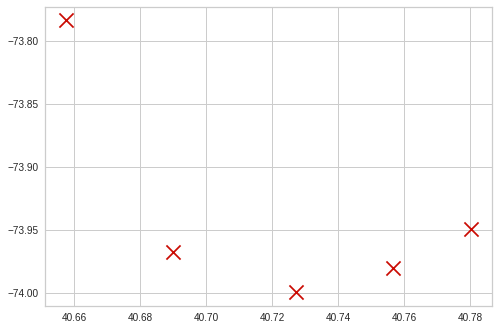

In [27]:
plt.scatter(clocation_fuz_ori['Latitude'], clocation_fuz_ori['Longitude'], marker = "x", color = 'R', s = 200)

In [28]:
centroid_fuz_ori = clocation_fuz_ori.values.tolist()

map_fuz_ori = folium.Map(location = [40.71600413400166, -73.98971408426613], zoom_start = 10)
for point in range(0, len(centroid_fuz_ori)):
    folium.Marker(centroid_fuz_ori[point], popup = centroid_fuz_ori[point]).add_to(map_fuz_ori)

map_fuz_ori

#Grouping and visualizing the total number of clusters

In [29]:
label_fuz_ori = np.argmax(u_ori, axis = 0)
label_fuz_ori

array([4, 3, 3, ..., 4, 3, 1])

In [30]:
df_new_fuz = df_ori.copy()
df_new_fuz['Clusters'] = label_fuz_ori
df_new_fuz

,Date/Time,Lat,Lon,Base,Clusters
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,4
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,3
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,3
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,2
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,2
...,...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764,2
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764,3
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764,4
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764,3


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


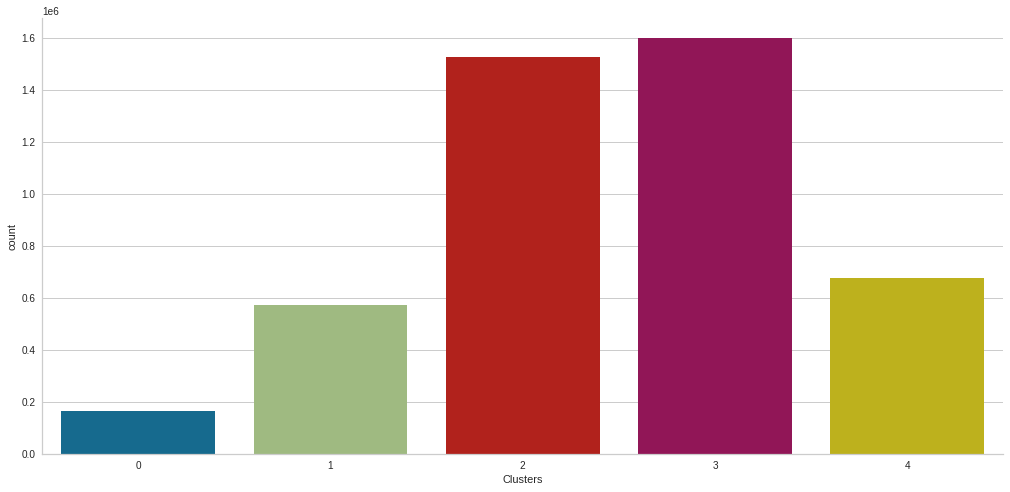

In [31]:
sb.factorplot(data = df_new_fuz, x = "Clusters", kind = "count", size = 7, aspect = 2)

#Visualize datapoint

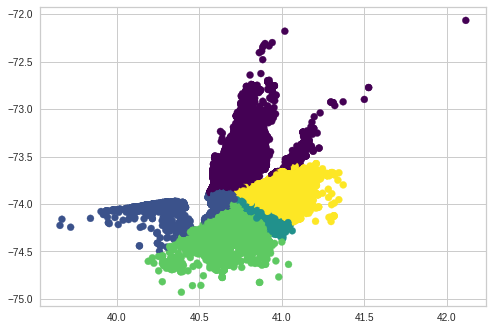

In [32]:
plt.scatter(df_new_fuz['Lat'], df_new_fuz['Lon'], c = label_fuz_ori, cmap='viridis');

# 3. Gaussian Mixture Modelling

#Selecting Feature

In [33]:
clus_gmm_ori = df_ori[['Lat', 'Lon']]

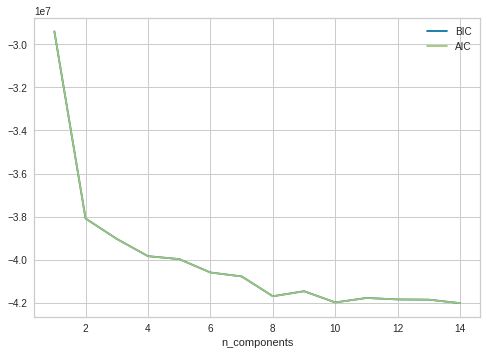

In [34]:
n_components = np.arange(1, 15)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(clus_gmm_ori) for n in n_components]
plt.plot(n_components, [m.bic(clus_gmm_ori) for m in models], label='BIC')
plt.plot(n_components, [m.aic(clus_gmm_ori) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [35]:
clf = mixture.GaussianMixture(n_components=5, covariance_type='full')
clf.fit(clus_gmm_ori)

GaussianMixture(n_components=5)

In [36]:
label_gmm_ori = clf.predict(clus_gmm_ori)

In [37]:
df_new_gmm = df_ori.copy()
df_new_gmm['Clusters'] = label_gmm_ori
df_new_gmm

,Date/Time,Lat,Lon,Base,Clusters
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,0
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,3
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,0
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,0
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,0
...,...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764,0
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764,4
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764,2
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764,0


In [38]:
df_new_gmm['Clusters'].unique()

array([0, 3, 1, 2, 4])

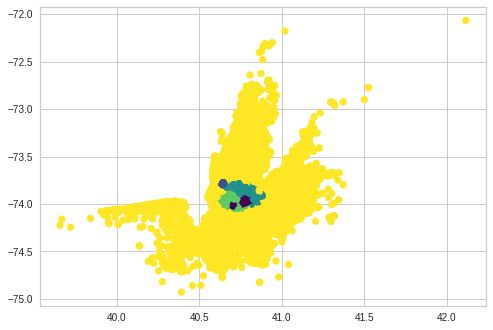

In [39]:
plt.scatter(df_new_gmm['Lat'], df_new_gmm['Lon'], c = label_gmm_ori, cmap='viridis');

#Predict new location

In [40]:
new_location_gmm = [(43.86, -71.56)]
clf.predict(new_location_gmm)

array([4])

# II. Pre-processed data & Analysis

#Row bind using concatenate

In [41]:
df_prep = df_ori.copy()

In [42]:
df_prep = df_prep.rename(columns = {'Date/Time' : 'Date_Time'}) #rename Date/Time -> Date_Time

In [43]:
df_prep.shape

(4534327, 4)

In [44]:
df_prep.head()

,Date_Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


#Split Date/Time

In [45]:
df_prep['Date_Time'] =  pd.to_datetime(df_prep['Date_Time']) #convert to datetime
df_prep['Month'] = df_prep.Date_Time.apply(lambda x: x.month) #Month
df_prep['Day'] = df_prep.Date_Time.apply(lambda x: x.day) #Day
df_prep['Hour'] =  df_prep.Date_Time.apply(lambda x: x.hour) #hour
df_prep['Minute'] =  df_prep.Date_Time.apply(lambda x: x.minute) #minute
df_prep['Weekday'] = df_prep.Date_Time.apply(lambda x: x.weekday()) #weekday & onehot encoder

holidays = calendar().holidays(start = df_prep['Date_Time'].min(), end = df_prep['Date_Time'].max()) #get the holiday in US calendar
df_prep['Holiday'] = df_prep['Date_Time'].isin(holidays).astype('int') #holidays

In [46]:
df_prep

,Date_Time,Lat,Lon,Base,Month,Day,Hour,Minute,Weekday,Holiday
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4,1,0,11,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,4,1,0,17,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,4,1,0,21,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,4,1,0,28,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,4,1,0,33,1,0
...,...,...,...,...,...,...,...,...,...,...
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,9,30,22,57,1,0
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,9,30,22,57,1,0
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,9,30,22,58,1,0
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,9,30,22,58,1,0


# 1. Kmeans clustering

#Selecting Feature

In [47]:
clus_k_prep = df_prep[['Lat', 'Lon', 'Day', 'Month', 'Hour', 'Minute', 'Weekday', 'Holiday']]
clus_k_prep.dtypes

Lat        float64
Lon        float64
Day          int64
Month        int64
Hour         int64
Minute       int64
Weekday      int64
Holiday      int64
dtype: object

#Plot the number of clusters

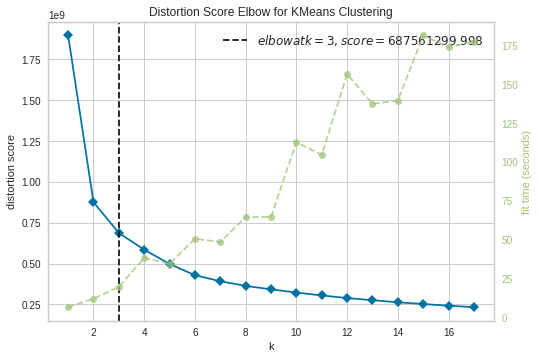

In [48]:
model_prep = KMeans()
visualizer_prep = KElbowVisualizer(model_prep, k = (1, 18)) #k = 1 to 17
visualizer_prep.fit(clus_k_prep)
visualizer_prep.show()

#Assign number of cluster in K-Means Algorithm

In [49]:
kmeans_prep = KMeans(n_clusters = 3, random_state = 0) #k = 3
kmeans_prep.fit(clus_k_prep) 

KMeans(n_clusters=3, random_state=0)

#Storing the Centroid

In [50]:
centroids_k_prep = kmeans_prep.cluster_centers_
centroids_k_prep

array([[ 4.07392785e+01, -7.39729732e+01,  1.59332922e+01,
         6.83045933e+00,  1.41738227e+01,  2.95001800e+01,
         2.96018300e+00, -5.44980998e-18],
       [ 4.07391946e+01, -7.39731940e+01,  1.59461696e+01,
         6.82284134e+00,  1.41652752e+01,  4.94809797e+01,
         2.96765106e+00, -5.90890184e-18],
       [ 4.07393085e+01, -7.39728928e+01,  1.59505806e+01,
         6.83274861e+00,  1.43146857e+01,  9.48961154e+00,
         2.97642769e+00,  2.03515166e-05]])

In [51]:
clocation_k_prep = pd.DataFrame(centroids_k_prep, columns = ['Latitude', 'Longitude','Day', 'Month', 'Hour', 'Minute', 'Weekday', 'Holiday'])

#Get the Lat and Lon to visualize

In [52]:
clocation_k_prep_map = clocation_k_prep[['Latitude', 'Longitude']]

#Visualize Centroids

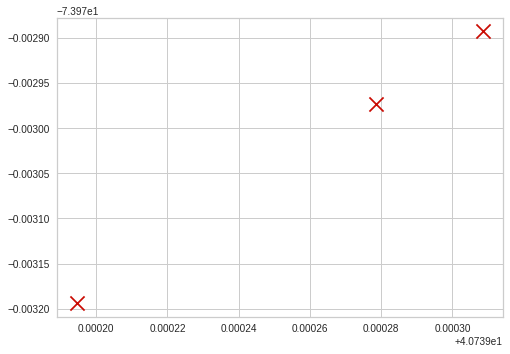

In [53]:
plt.scatter(clocation_k_prep_map['Latitude'], clocation_k_prep_map['Longitude'], marker = "x", color = 'R', s = 200)

#Visualize Latitude and Longitude

In [54]:
centroid_k_prep = clocation_k_prep_map.values.tolist()

map_k_prep = folium.Map(location = [40.7392, -73.973], zoom_start = 20)
for point in range(0, len(centroid_k_prep)):
    folium.Marker(centroid_k_prep[point], popup = centroid_k_prep[point]).add_to(map_k_prep)

map_k_prep

#Grouping and visualizing the total number of clusters

In [55]:
label_k_prep = kmeans_prep.labels_
label_k_prep

array([2, 2, 0, ..., 1, 1, 1], dtype=int32)

In [56]:
df_prep_new_k = df_prep.copy()
df_prep_new_k['Clusters'] = label_k_prep
df_prep_new_k

,Date_Time,Lat,Lon,Base,Month,Day,Hour,Minute,Weekday,Holiday,Clusters
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4,1,0,11,1,0,2
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,4,1,0,17,1,0,2
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,4,1,0,21,1,0,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,4,1,0,28,1,0,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,4,1,0,33,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,9,30,22,57,1,0,1
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,9,30,22,57,1,0,1
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,9,30,22,58,1,0,1
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,9,30,22,58,1,0,1


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


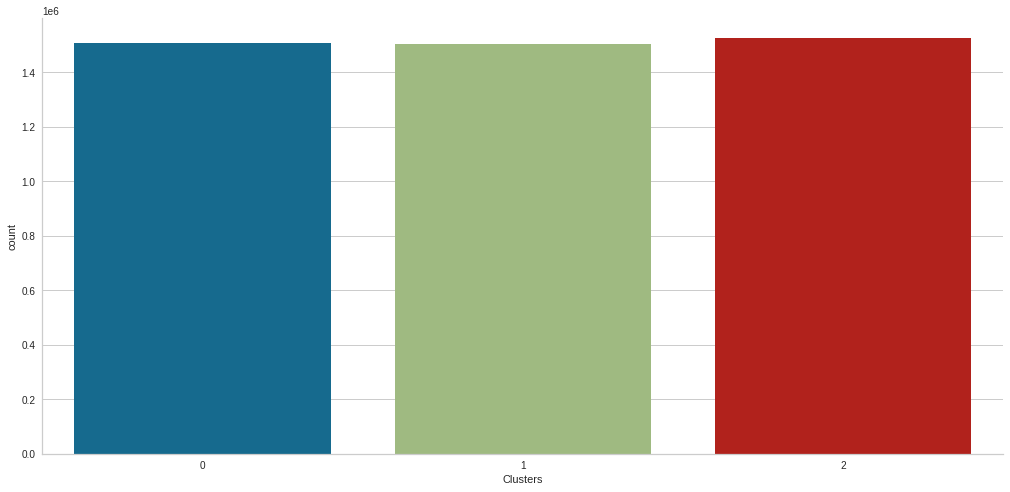

In [57]:
sb.factorplot(data = df_prep_new_k, x = "Clusters", kind = "count", size = 7, aspect = 2)

#Predict cluster

In [58]:
new_location_prep = [(40.86, -75.56, 20, 8, 5, 37, 0, 0)]
kmeans_prep.predict(new_location_prep)

array([0], dtype=int32)

# 2. Sklearn Fuzzy

#Selecting feature

In [59]:
clus_fuz_prep = df_prep[['Lat', 'Lon','Day', 'Month', 'Hour', 'Minute', 'Weekday', 'Holiday']]

#For loop to determine the number of cluster

In [60]:
fpcs_prep = []

# n_cluster = 1 to 11
for n_cluster in range(1, 11):
    cntr_prep, u, u0, d, jm, p, fpc_prep = cmeans(clus_fuz_prep.T, n_cluster, 2 , error=0.01, maxiter=1000)
    fpcs_prep.append(fpc_prep)

#Plot the number of cluster

Text(0, 0.5, 'Fuzzy partition coefficient')

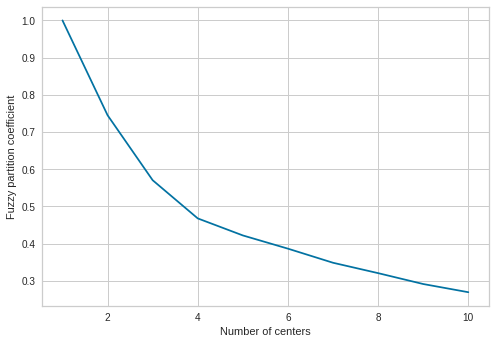

In [61]:
fig, ax = plt.subplots()
ax.plot(np.r_[1:11], fpcs_prep)
ax.set_xlabel("Number of centers")
ax.set_ylabel("Fuzzy partition coefficient")

#C-mean algorithm

In [62]:
cntr_prep, u_orig, _, _, _, _, _ = cmeans(clus_fuz_prep.T, 5, 2 , error=0.01, maxiter=1000)

#Predict the label

In [63]:
u_prep, u0, d, jm, p, pc = cmeans_predict(clus_fuz_prep.T, cntr_prep, 2 , error=0.01, maxiter=1000)

#Storing the centroid

In [64]:
centroids_fuz_prep = cntr_prep
centroids_fuz_prep

array([[ 4.07397578e+01, -7.39731568e+01,  9.44434379e+00,
         6.84958925e+00,  1.46984398e+01,  1.09554761e+01,
         2.93102090e+00,  1.43119873e-05],
       [ 4.07396496e+01, -7.39735701e+01,  9.42573480e+00,
         6.83853754e+00,  1.44604852e+01,  4.79851317e+01,
         2.92375159e+00,  3.89150161e-07],
       [ 4.07395034e+01, -7.39726027e+01,  2.25677176e+01,
         6.81456202e+00,  1.46358677e+01,  1.11017679e+01,
         2.98111402e+00,  8.55907880e-06],
       [ 4.07393197e+01, -7.39728605e+01,  2.25858599e+01,
         6.80493253e+00,  1.44546526e+01,  4.77660648e+01,
         2.98631733e+00,  3.43329730e-07],
       [ 4.07396266e+01, -7.39732384e+01,  1.57201862e+01,
         6.84861158e+00,  1.44403608e+01,  2.93969935e+01,
         2.94341996e+00,  1.71808934e-06]])

#Get the Lat and Lon to visualize

In [65]:
clocation_fuz_prep = pd.DataFrame(centroids_fuz_prep, columns = ['Latitude', 'Longitude','Day', 'Month', 'Hour', 'Minute', 'Weekday', 'Holiday'])

In [66]:
clocation_fuz_prep_map = clocation_fuz_prep[['Latitude', 'Longitude']]

#Visualize Centroids

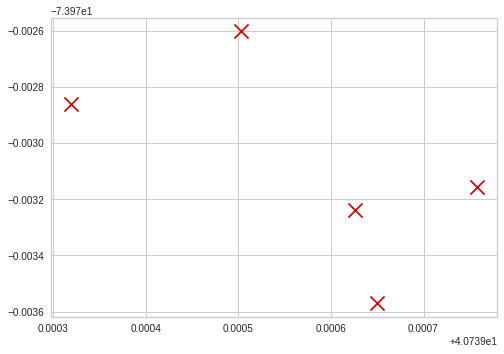

In [67]:
plt.scatter(clocation_fuz_prep_map['Latitude'], clocation_fuz_prep_map['Longitude'], marker = "x", color = 'R', s = 200)

#Visualize Latitude and Longitude

In [68]:
centroid_fuz_prep = clocation_fuz_prep_map.values.tolist()

map_fuz_prep = folium.Map(location = [40.71600413400166, -73.98971408426613], zoom_start = 10)
for point in range(0, len(centroid_fuz_prep)):
    folium.Marker(centroid_fuz_prep[point], popup = centroid_fuz_prep[point]).add_to(map_fuz_prep)

map_fuz_prep

#Grouping and visualizing the total number of clusters

In [69]:
label_fuz_prep = np.argmax(u_prep, axis = 0)
label_fuz_prep

array([0, 0, 0, ..., 3, 3, 3])

In [70]:
df_prep_new_fuz = df_prep.copy()
df_prep_new_fuz['Clusters'] = label_fuz_prep
df_prep_new_fuz

,Date_Time,Lat,Lon,Base,Month,Day,Hour,Minute,Weekday,Holiday,Clusters
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4,1,0,11,1,0,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,4,1,0,17,1,0,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,4,1,0,21,1,0,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,4,1,0,28,1,0,4
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,4,1,0,33,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,9,30,22,57,1,0,3
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,9,30,22,57,1,0,3
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,9,30,22,58,1,0,3
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,9,30,22,58,1,0,3


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


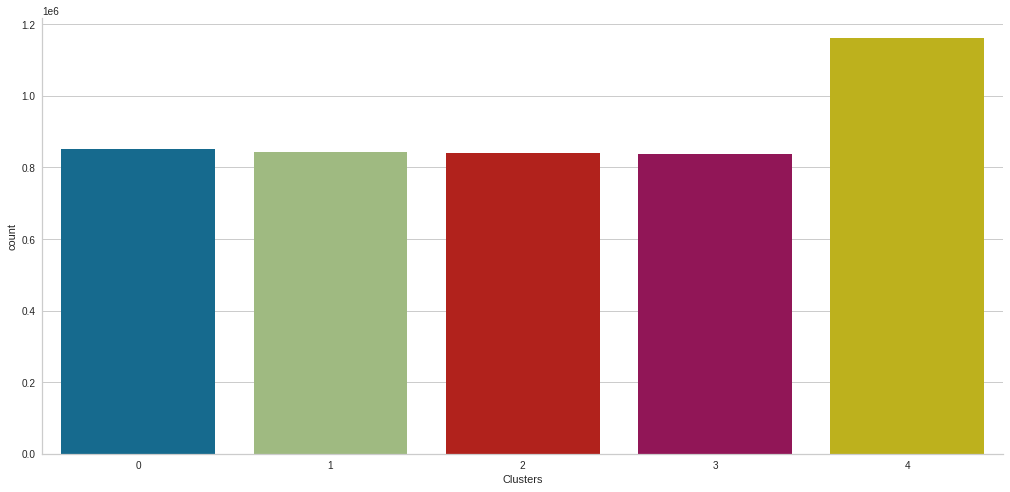

In [71]:
sb.factorplot(data = df_prep_new_fuz, x = "Clusters", kind = "count", size = 7, aspect = 2)

#Visualize datapoint

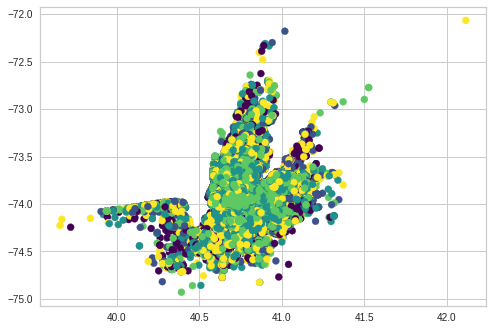

In [72]:
plt.scatter(df_prep_new_fuz['Lat'], df_prep_new_fuz['Lon'], c = label_fuz_prep, cmap='viridis');

# 3. Gaussian Mixture Modelling

#Selecting Feature

In [73]:
clus_gmm_prep = df_prep[['Lat', 'Lon','Day', 'Month', 'Hour', 'Minute', 'Weekday', 'Holiday']]

#For loop to determine the number of cluster

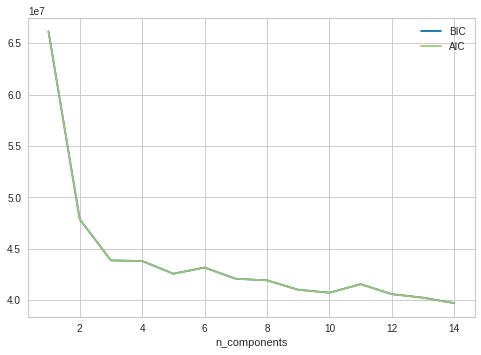

In [74]:
n_components = np.arange(1, 15)
models_gmm_prep = [GaussianMixture(n, covariance_type='full', random_state=0).fit(clus_gmm_prep) for n in n_components]
plt.plot(n_components, [m.bic(clus_gmm_prep) for m in models_gmm_prep], label='BIC')
plt.plot(n_components, [m.aic(clus_gmm_prep) for m in models_gmm_prep], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [75]:
clf_prep = mixture.GaussianMixture(n_components=5, covariance_type='full')
clf_prep.fit(clus_gmm_prep)


GaussianMixture(n_components=5)

In [76]:
label_gmm_prep = clf_prep.predict(clus_gmm_prep)

In [77]:
df_new_prep_gmm = df_ori.copy()
df_new_prep_gmm['Clusters'] = label_gmm_prep
df_new_prep_gmm

,Date/Time,Lat,Lon,Base,Clusters
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,2
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,3
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,2
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,0
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,0
...,...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764,0
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764,4
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764,4
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764,0


In [78]:
df_new_prep_gmm['Clusters'].unique()

array([2, 3, 0, 4, 1])

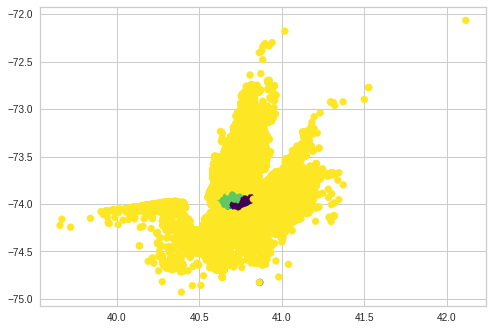

In [79]:
plt.scatter(df_new_prep_gmm['Lat'], df_new_prep_gmm['Lon'], c = label_gmm_prep, cmap='viridis');

#Predict new location

In [80]:
new_location_prep_gmm = [(40.86, -75.56, 20, 8, 5, 37, 0, 0)]
clf_prep.predict(new_location_prep_gmm)

array([4])